<a href="https://colab.research.google.com/github/EddyGiusepe/Repasso_Python/blob/main/Pandas_Library_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">Usando a biblioteca Pandas com Python</h2>


Data scientist.: Dr.Eddy Giusepe Chirinos Isidro

Python tem a biblioteca ``Pandas`` para poder trabalhar com Dados tabulares.

Depois de estudar este tutorial, você haverá aprendido:

* o que a biblioteca de ``Pandas`` oferece
* o que é um ``DataFrame`` e uma série em pandas
* como manipular DataFrame e Séries além das operações triviais de array.


Este tutorial, está baseado no tutorial de [Machine Learning Mastery  - Jason Brownlee PhD](https://machinelearningmastery.com/massaging-data-using-pandas/?utm_source=drip&utm_medium=email&utm_campaign=Massaging+data+using+pandas&utm_content=Massaging+data+using+pandas) e  está dividido em cinco partes:

* DataFrame e Série
* Funções essenciais no DataFrame
* Manipulando DataFrames e Séries
* Agregação em DataFrames
* Manipulando dados de série temporal em pandas

# DataFrame e Série

Vamos começar com um conjunto de dados de exemplo. Vamos importar ``Pandas`` e ler os [Dados de emissão de poluentes atmosféricos dos EUA](https://www.epa.gov/air-emissions-inventories/air-pollutant-emissions-trends-data) em um ``DataFrame``:

In [1]:
# Importamos as bibliotecas mais comuns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Criamos o DataFrame
 
URL = "https://www.epa.gov/sites/default/files/2021-03/state_tier1_caps.xlsx"
 
df = pd.read_excel(URL, sheet_name="State_Trends", header=1)
df.sample(5)

,State FIPS,State,Tier 1 Code,Tier 1 Description,Pollutant,emissions90,emissions96,emissions97,emissions98,emissions99,...,emissions12,emissions13,emissions14,emissions15,emissions16,emissions17,emissions18,emissions19,emissions20,emissions21
672,9,CT,7,OTHER INDUSTRIAL PROCESSES,PM25-PRI,1.51807,0.44113,0.46100,0.52991,0.644207,...,1.397673,1.471266,1.544858,1.657963,1.771067,1.884171,1.873920,1.880447,1.880447,1.880447
1643,19,IA,15,WILDFIRES,PM25-PRI,NaN,NaN,NaN,NaN,NaN,...,0.398668,0.398668,0.987371,0.987371,0.987371,1.468453,1.671404,0.009357,0.009357,0.009357
872,11,DC,8,SOLVENT UTILIZATION,NH3,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3498,37,NC,9,STORAGE & TRANSPORT,SO2,NaN,0.00147,0.00142,0.00142,0.003091,...,0.009434,0.011445,0.013456,0.010240,0.007025,0.003810,0.004750,0.001810,0.001810,0.001810
1358,17,IL,3,FUEL COMB. OTHER,VOC,14.12928,33.34094,33.00421,32.53227,29.355479,...,13.570192,13.770456,13.970721,12.391573,10.812425,9.233313,9.495635,9.515142,9.515142,9.515142


In [3]:
# Shape

df.shape

(5319, 32)

O objeto ``pandas`` criado acima é um DataFrame, apresentado como uma tabela. Semelhante ao ``NumPy``, os dados no Pandas são organizados em matrizes. Mas os Pandas atribuem um tipo de dados a colunas em vez de uma matriz inteira. Isso permite que dados de diferentes tipos sejam incluídos na mesma estrutura de dados. 

Podemos verificar o tipo de dados chamando a o método (ou função) ``.info()`` do DataFrame:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5319 entries, 0 to 5318
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State FIPS          5319 non-null   int64  
 1   State               5319 non-null   object 
 2   Tier 1 Code         5319 non-null   int64  
 3   Tier 1 Description  5319 non-null   object 
 4   Pollutant           5319 non-null   object 
 5   emissions90         3926 non-null   float64
 6   emissions96         4163 non-null   float64
 7   emissions97         4163 non-null   float64
 8   emissions98         4164 non-null   float64
 9   emissions99         4281 non-null   float64
 10  emissions00         4280 non-null   float64
 11  emissions01         4277 non-null   float64
 12  emissions02         4720 non-null   float64
 13  emissions03         4939 non-null   float64
 14  emissions04         4939 non-null   float64
 15  emissions05         4561 non-null   float64
 16  emissi

In [5]:
# Também podemos obter o tipo como uma série de pandas:

df.dtypes


State FIPS              int64
State                  object
Tier 1 Code             int64
Tier 1 Description     object
Pollutant              object
emissions90           float64
emissions96           float64
emissions97           float64
emissions98           float64
emissions99           float64
emissions00           float64
emissions01           float64
emissions02           float64
emissions03           float64
emissions04           float64
emissions05           float64
emissions06           float64
emissions07           float64
emissions08           float64
emissions09           float64
emissions10           float64
emissions11           float64
emissions12           float64
emissions13           float64
emissions14           float64
emissions15           float64
emissions16           float64
emissions17           float64
emissions18           float64
emissions19           float64
emissions20           float64
emissions21           float64
dtype: object

No ``Pandas``, um ``DataFrame`` é uma tabela, enquanto uma **série é uma coluna da tabela**. Essa distinção é importante porque os dados por trás de um ``DataFrame são uma matriz 2D``, enquanto uma ``série é uma matriz 1D``.

Semelhante à indexação sofisticada no ``NumPy``, podemos extrair colunas de um DataFrame para criar outro:

In [6]:
cols = ["State", "Pollutant", "emissions19", "emissions20", "emissions21"]

# DataFrame dos três últimos anos
last3years = df[cols] 
last3years.head(7)


,State,Pollutant,emissions19,emissions20,emissions21
0,AL,CO,8.243679,8.243679,8.243679
1,AL,NH3,0.417551,0.417551,0.417551
2,AL,NOX,19.592480,13.752790,11.162100
3,AL,PM10-PRI,2.868642,2.868642,2.868642
4,AL,PM25-PRI,2.659792,2.659792,2.659792
5,AL,SO2,6.416268,3.277997,4.223016
6,AL,VOC,1.183584,1.183584,1.183584


Ou, se passarmos um nome de coluna como uma string em vez de uma lista de nomes de coluna, extraímos uma coluna de um ``DataFrame como uma série``:

In [7]:
data2021 = df['emissions21']
data2021.head(6)

0     8.243679
1     0.417551
2    11.162100
3     2.868642
4     2.659792
5     4.223016
Name: emissions21, dtype: float64

# Funções essenciais no DataFrame

``Pandas`` é rico em recursos. Muitas operações essenciais em uma tabela ou coluna são fornecidas como funções definidas no **DataFrame** ou **Séries**. Por exemplo, podemos ver uma lista de poluentes cobertos na tabela acima usando:

In [8]:
print(df['Pollutant'].unique())

['CO' 'NH3' 'NOX' 'PM10-PRI' 'PM25-PRI' 'SO2' 'VOC']


E podemos encontrar a média (``.mean()``), desvio padrão (``.std()``), mínimo (``.min()``) e máximo (``.max()``) de uma série de forma semelhante:

In [9]:
# Por exemplo: a média do ano 2021

df['emissions21'].mean()

19.26453203565005

Mas, na verdade, é mais provável que usemos a função ``.describe()`` para explorar um novo DataFrame. Como o DataFrame neste exemplo tem muitas colunas, é melhor transpor o DataFrame resultante de ``.describe()``:

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State FIPS,5319.0,29.039481,15.667352,1.00000,16.000000,29.000000,42.000000,56.000000
Tier 1 Code,5319.0,8.213198,4.610970,1.00000,4.000000,8.000000,12.000000,16.000000
emissions90,3926.0,67.885173,373.308888,0.00000,0.474330,4.042665,20.610050,11893.764890
emissions96,4163.0,54.576353,264.951584,0.00001,0.338420,3.351860,16.804540,6890.969060
emissions97,4163.0,51.635867,249.057529,0.00001,0.335830,3.339820,16.679675,6547.791030
emissions98,4164.0,50.801607,240.583301,0.00001,0.344537,3.333940,16.579365,6187.792400
emissions99,4281.0,48.574331,224.351639,0.00000,0.298280,3.198574,16.993275,5701.037970
emissions00,4280.0,48.331283,228.045136,0.00000,0.301689,3.191610,16.240101,5828.319510
emissions01,4277.0,45.379913,208.045773,0.00000,0.306105,3.194570,16.091365,4600.093520
emissions02,4720.0,40.620586,211.845254,0.00000,0.132365,1.898117,12.613465,8402.863427


De fato, o DataFrame produzido por ``.describe()`` pode nos ajudar a ter uma noção dos dados. A partir daí, podemos dizer quantos dados faltantes existem (observando a contagem), como os dados são distribuídos, se há discrepâncias e assim por diante.

# Manipulando DataFrame e Séries

Semelhante à indexação booleana no NumPy, podemos extrair um subconjunto de linhas de um DataFrame. Por exemplo, é assim que podemos selecionar os dados apenas para **emissões de monóxido de carbono**:

In [11]:
df_CO = df[df["Pollutant"] == "CO"]
df_CO.head(7)

,State FIPS,State,Tier 1 Code,Tier 1 Description,Pollutant,emissions90,emissions96,emissions97,emissions98,emissions99,...,emissions12,emissions13,emissions14,emissions15,emissions16,emissions17,emissions18,emissions19,emissions20,emissions21
0,1,AL,1,FUEL COMB. ELEC. UTIL.,CO,6.86859,8.06884,8.04705,8.12158,11.515260,...,9.642311,9.326977,9.011643,9.125182,9.238721,9.323161,10.050146,8.243679,8.243679,8.243679
7,1,AL,2,FUEL COMB. INDUSTRIAL,CO,25.73799,49.77487,48.15407,48.41578,43.880430,...,66.747109,61.629518,56.511926,43.656232,30.800538,17.973944,19.148024,17.291741,17.291741,17.291741
14,1,AL,3,FUEL COMB. OTHER,CO,89.93378,34.23424,34.29082,34.15163,65.515923,...,14.997904,17.892071,20.786239,23.581487,26.376736,29.171984,29.207209,29.201838,29.201838,29.201838
21,1,AL,4,CHEMICAL & ALLIED PRODUCT MFG,CO,54.70092,44.23310,45.59779,46.96713,7.853820,...,3.133778,3.144600,3.155423,3.214001,3.272579,3.331158,2.774257,2.626484,2.626484,2.626484
28,1,AL,5,METALS PROCESSING,CO,6.61641,36.12170,37.64911,36.86870,31.767940,...,11.173101,11.354717,11.536333,11.766012,11.995691,12.225369,12.534726,12.167189,12.167189,12.167189
35,1,AL,6,PETROLEUM & RELATED INDUSTRIES,CO,16.21475,1.15640,1.15842,1.15944,10.469120,...,14.444104,14.005973,13.567842,11.029530,8.491219,5.952907,5.804215,6.254160,6.254160,6.254160
42,1,AL,7,OTHER INDUSTRIAL PROCESSES,CO,68.68642,64.08936,66.39766,67.06835,61.059700,...,24.596882,29.485416,34.373950,33.146481,31.919012,30.691313,31.686766,31.040208,31.040208,31.040208


Como você pode esperar, o operador ``==`` compara cada elemento de uma série  ``df["Pollutant"]``, resultando em uma **série de valores booleanos**. Se os comprimentos corresponderem, o DataFrame entende que é para selecionar as linhas com base no valor booleano. Na verdade, podemos combinar booleanos usando operadores bit a bit (bitwise). Por exemplo, é assim que selecionamos as linhas de <font color='yellow'>emissões de monóxido de carbono devido aos veículos rodoviários</font>:

In [12]:
# Aqui: HIGHWAY VEHICLES --> VEÍCULOS RODOVIÁRIOS

df_CO_HW = df[ (df['Pollutant']=='CO') & (df['Tier 1 Description']=='HIGHWAY VEHICLES') ]
df_CO_HW.head(3)

,State FIPS,State,Tier 1 Code,Tier 1 Description,Pollutant,emissions90,emissions96,emissions97,emissions98,emissions99,...,emissions12,emissions13,emissions14,emissions15,emissions16,emissions17,emissions18,emissions19,emissions20,emissions21
70,1,AL,11,HIGHWAY VEHICLES,CO,2340.75406,1674.01395,1602.25032,1534.27815,1412.34247,...,706.703031,711.628370,716.553710,682.596952,588.545740,556.784903,532.140445,518.259811,492.182583,466.105354
171,2,AK,11,HIGHWAY VEHICLES,CO,262.38870,173.25628,173.86574,175.12039,169.92004,...,85.189732,78.699239,72.208745,70.614685,60.100755,67.426567,70.674008,70.674008,63.883471,57.092934
276,4,AZ,11,HIGHWAY VEHICLES,CO,1616.75178,1084.92615,1065.99933,1049.76456,1017.64515,...,560.612368,557.832176,555.051985,549.795535,468.667272,487.903594,433.685363,413.347655,398.958109,384.568563


Se você preferir selecionar linhas como uma lista do Python, poderá fazê-lo por meio da interface ``iloc``. É assim que podemos selecionar as linhas de $5$ a $10$ (indexadas a zero) ou as colunas de $1$ a $6$ e as linhas de $5$ a $10$:

In [13]:
df_r5 = df.iloc[5:11] # pegando apenas as linhas

df_c1_r5 = df.iloc[5:11, 1:7] # linhas 5:11  e  colunas 1:7

In [14]:
df_r5.head(10)

,State FIPS,State,Tier 1 Code,Tier 1 Description,Pollutant,emissions90,emissions96,emissions97,emissions98,emissions99,...,emissions12,emissions13,emissions14,emissions15,emissions16,emissions17,emissions18,emissions19,emissions20,emissions21
5,1,AL,1,FUEL COMB. ELEC. UTIL.,SO2,528.64015,584.96044,567.98876,575.47384,542.657340,...,159.522550,139.722498,119.922446,83.443274,46.964102,10.482160,11.987609,6.416268,3.277997,4.223016
6,1,AL,1,FUEL COMB. ELEC. UTIL.,VOC,0.79719,0.99511,0.99250,1.00374,2.234870,...,1.217204,1.282610,1.348015,1.303014,1.258013,1.208703,1.316399,1.183584,1.183584,1.183584
7,1,AL,2,FUEL COMB. INDUSTRIAL,CO,25.73799,49.77487,48.15407,48.41578,43.880430,...,66.747109,61.629518,56.511926,43.656232,30.800538,17.973944,19.148024,17.291741,17.291741,17.291741
8,1,AL,2,FUEL COMB. INDUSTRIAL,NH3,0.38396,1.31672,1.28847,1.31280,0.453654,...,0.755929,0.699112,0.642294,0.439639,0.236984,0.034329,0.056726,0.058051,0.058051,0.058051
9,1,AL,2,FUEL COMB. INDUSTRIAL,NOX,75.01940,98.58690,96.90908,96.43691,63.362050,...,36.727965,38.008567,39.289169,32.841984,26.394798,19.971913,22.071043,20.168023,20.168023,20.168023
10,1,AL,2,FUEL COMB. INDUSTRIAL,PM10-PRI,12.63573,10.87613,10.53728,10.56054,8.582618,...,47.242034,48.209684,49.177334,33.767944,18.358553,2.971842,3.363220,2.806757,2.806757,2.806757


In [15]:
df_c1_r5.head(10)

,State,Tier 1 Code,Tier 1 Description,Pollutant,emissions90,emissions96
5,AL,1,FUEL COMB. ELEC. UTIL.,SO2,528.64015,584.96044
6,AL,1,FUEL COMB. ELEC. UTIL.,VOC,0.79719,0.99511
7,AL,2,FUEL COMB. INDUSTRIAL,CO,25.73799,49.77487
8,AL,2,FUEL COMB. INDUSTRIAL,NH3,0.38396,1.31672
9,AL,2,FUEL COMB. INDUSTRIAL,NOX,75.01940,98.58690
10,AL,2,FUEL COMB. INDUSTRIAL,PM10-PRI,12.63573,10.87613


Se você estiver familiarizado com o ``Excel``, provavelmente conhece um de seus recursos interessantes chamado “``tabela dinâmica``”. ``Pandas`` permite que você faça o mesmo. Vamos considerar a poluição de monóxido de carbono de todos os estados em 2021 a partir deste conjunto de dados:

In [16]:
df_all_co = df[df["Pollutant"] == "CO"][["State", "Tier 1 Description", "emissions21"]]

df_all_co.head()

,State,Tier 1 Description,emissions21
0,AL,FUEL COMB. ELEC. UTIL.,8.243679
7,AL,FUEL COMB. INDUSTRIAL,17.291741
14,AL,FUEL COMB. OTHER,29.201838
21,AL,CHEMICAL & ALLIED PRODUCT MFG,2.626484
28,AL,METALS PROCESSING,12.167189


In [17]:
df_all_co.shape

(760, 3)

Através da tabela dinâmica, podemos fazer as diferentes formas de emissão de monóxido de carbono como colunas e diferentes estados como linhas:

In [18]:
df_pivot = df_all_co.pivot_table(index = "State", columns = "Tier 1 Description", values = "emissions21")


df_pivot.head()


Tier 1 Description,CHEMICAL & ALLIED PRODUCT MFG,FUEL COMB. ELEC. UTIL.,FUEL COMB. INDUSTRIAL,FUEL COMB. OTHER,HIGHWAY VEHICLES,METALS PROCESSING,MISCELLANEOUS,OFF-HIGHWAY,OTHER INDUSTRIAL PROCESSES,PETROLEUM & RELATED INDUSTRIES,PRESCRIBED FIRES,SOLVENT UTILIZATION,STORAGE & TRANSPORT,WASTE DISPOSAL & RECYCLING,WILDFIRES
State,,,,,,,,,,,,,,,
AK,NaN,4.679098,7.780446,225.802864,57.092934,0.050133,1.745362,53.500832,0.492499,4.531370,286.474361,NaN,0.056500,0.146018,4562.151689
AL,2.626484,8.243679,17.291741,29.201838,466.105354,12.167189,10.657049,191.953551,31.040208,6.254160,437.438647,0.168992,0.007686,47.241253,38.780562
AR,0.307811,5.027354,23.058056,46.680001,203.971567,6.066433,39.449980,129.115676,11.111067,6.389661,531.262844,0.008284,0.004482,26.234267,3.125529
AZ,0.000000,4.483514,1.763194,15.810092,384.568563,0.752409,3.229801,207.813693,11.153465,0.016421,66.316136,0.021141,0.011701,6.438484,248.713896
CA,0.876666,6.819343,31.690680,149.373372,546.577559,0.209140,38.919176,684.594388,26.858656,2.357080,97.319417,0.432730,0.492900,27.438453,465.881783


In [19]:
df_pivot.shape

(51, 15)

A função ``pivot_table()`` acima não exige que os valores sejam exclusivos para o índice e as colunas. Em outras palavras, se houver duas linhas “``wildfire``” em um estado no DataFrame original, essa função agregará as duas (o padrão é obter a média). Para reverter a operação de pivô (pivot), temos a ``melt()`` função:

In [20]:
df_melt = df_pivot.melt(value_name = "emissions 2021", var_name = "Tier 1 Description", ignore_index = False)


df_melt.head()

,Tier 1 Description,emissions 2021
State,,
AK,CHEMICAL & ALLIED PRODUCT MFG,NaN
AL,CHEMICAL & ALLIED PRODUCT MFG,2.626484
AR,CHEMICAL & ALLIED PRODUCT MFG,0.307811
AZ,CHEMICAL & ALLIED PRODUCT MFG,0.000000
CA,CHEMICAL & ALLIED PRODUCT MFG,0.876666


Há muito mais que podemos fazer com um DataFrame. <font color="orange">Por exemplo</font>, podemos classificar as linhas (usando a função ``sort_values()``), renomear colunas (usando a função ``rename()``), remover linhas redundantes (``drop_duplicates()``)


Em um projeto de aprendizado de máquina, geralmente precisamos fazer algumas limpezas antes de podermos usar os dados. É útil usar pandas para essa finalidade. O DataFrame df_pivot que acabamos de criar tem alguns valores marcados como ``NaN`` sem dados disponíveis. **Podemos substituir todos aqueles com zero por qualquer um dos seguintes**:

In [21]:
df_pivot.fillna(0)

df_pivot.where(df_pivot.notna(), 0)

df_pivot.mask(df_pivot.isna(), 0)

Tier 1 Description,CHEMICAL & ALLIED PRODUCT MFG,FUEL COMB. ELEC. UTIL.,FUEL COMB. INDUSTRIAL,FUEL COMB. OTHER,HIGHWAY VEHICLES,METALS PROCESSING,MISCELLANEOUS,OFF-HIGHWAY,OTHER INDUSTRIAL PROCESSES,PETROLEUM & RELATED INDUSTRIES,PRESCRIBED FIRES,SOLVENT UTILIZATION,STORAGE & TRANSPORT,WASTE DISPOSAL & RECYCLING,WILDFIRES
State,,,,,,,,,,,,,,,
AK,0.000000,4.679098,7.780446,225.802864,57.092934,0.050133,1.745362,53.500832,0.492499,4.531370,286.474361,0.000000,0.056500,0.146018,4562.151689
AL,2.626484,8.243679,17.291741,29.201838,466.105354,12.167189,10.657049,191.953551,31.040208,6.254160,437.438647,0.168992,0.007686,47.241253,38.780562
AR,0.307811,5.027354,23.058056,46.680001,203.971567,6.066433,39.449980,129.115676,11.111067,6.389661,531.262844,0.008284,0.004482,26.234267,3.125529
AZ,0.000000,4.483514,1.763194,15.810092,384.568563,0.752409,3.229801,207.813693,11.153465,0.016421,66.316136,0.021141,0.011701,6.438484,248.713896
CA,0.876666,6.819343,31.690680,149.373372,546.577559,0.209140,38.919176,684.594388,26.858656,2.357080,97.319417,0.432730,0.492900,27.438453,465.881783
CO,0.013220,7.410508,16.428686,38.713344,289.015039,0.786038,4.119938,256.410710,9.976156,38.004429,56.151980,0.025924,1.836220,3.800489,105.111667
CT,0.000000,0.524795,2.450608,29.750289,111.544247,0.000000,0.042294,115.954425,1.665355,0.000000,1.124380,0.000000,0.000000,0.548032,0.000000
DC,0.000000,0.000000,0.012720,0.961035,20.413995,0.000000,0.000294,7.621835,0.288114,0.005749,0.000000,0.000000,0.000000,0.002968,0.000000
DE,0.007891,0.477802,1.152836,6.360569,39.567587,0.000000,1.176028,54.993046,0.420900,0.919129,4.251235,0.000000,0.011732,0.455682,0.000000


# Agregação em DataFrames

Na verdade, os pandas podem fornecer manipulação de tabela que, de outra forma, só pode ser feita facilmente usando instruções ``SQL`` do banco de dados. Reutilizando o conjunto de dados de exemplo acima, cada poluente na tabela é dividido em diferentes fontes. Se quisermos conhecer as emissões agregadas de poluentes, basta somar todas as fontes. Semelhante ao SQL, esta é uma operação “``group by``”. Podemos fazê-lo com o seguinte:

In [22]:
df_sum = df[df["Pollutant"] == "CO"].groupby("State").sum()


df_sum.head()

,State FIPS,Tier 1 Code,emissions90,emissions96,emissions97,emissions98,emissions99,emissions00,emissions01,emissions02,...,emissions12,emissions13,emissions14,emissions15,emissions16,emissions17,emissions18,emissions19,emissions20,emissions21
State,,,,,,,,,,,,,,,,,,,,,
AK,28,115,4502.12238,883.50805,2421.50089,414.61444,2113.152998,965.370474,318.280263,8689.554049,...,2429.632757,2418.607827,2300.045425,2357.437521,2398.158622,4890.110917,5216.369575,5218.919502,5211.711803,5204.504105
AL,15,123,3404.01163,2440.95216,2369.26803,2361.43903,3011.541333,2265.144310,2151.200553,2139.640782,...,1865.985316,1909.107889,1929.506064,1776.102028,1549.953552,1339.803048,1574.068371,1350.711872,1324.945132,1299.178392
AR,75,123,1706.69006,1356.08524,1326.53142,1345.25313,1293.732544,1253.756263,1232.331321,1182.506250,...,1343.550287,1283.565013,1156.753717,1188.363699,1164.566421,1250.079084,1168.110471,1055.635824,1043.724418,1031.813011
AZ,60,123,2563.04249,1876.55422,1752.07274,1794.73961,2008.201731,1942.665698,1721.562860,2310.468908,...,2414.635520,2407.114865,1237.286833,1217.751771,1094.186652,1259.988694,1000.976184,977.916197,964.504353,951.092509
CA,90,123,15255.07897,11019.29365,10062.82448,9702.05636,8208.233005,9618.345877,7787.477742,5709.540910,...,3444.999810,3215.550865,5604.151765,5426.292799,5227.325184,5730.651458,5313.281485,2159.945594,2119.893468,2079.841343


O resultado da função ``groupby()`` usará a coluna de agrupamento como índice de linha. Ele funciona colocando linhas que têm o mesmo valor para essa coluna de agrupamento em um grupo. Então, como um grupo, alguma função de agregação é aplicada para reduzir as muitas linhas em uma. No exemplo acima, estamos fazendo a soma em cada coluna. O Pandas vem com muitas outras funções agregadas, como calcular a ``média`` ou apenas contar o número de linhas. Já que estamos fazendo ``sum()``.

Isso nos permite fazer algumas tarefas interessantes. Digamos que, usando os dados do DataFrame acima, criamos uma tabela da emissão total de monóxido de carbono (``CO``) e dióxido de enxofre (``SO2``) em $2021$ em cada estado. O raciocínio de como fazer isso seria:

```
1. Agrupe por “Estado” e “Poluente” e, em seguida, resuma cada grupo. É assim que obtemos a emissão
total de cada poluente em cada estado.

2. Selecione apenas a coluna para 2021

3. Execute a tabela dinâmica para fazer estados as linhas e os poluentes as colunas com a emissão
total como os valores

4. Selecione apenas a coluna para CO e SO2.
```


No código, isso pode ser:

In [23]:
df_2021 = ( df.groupby(["State", "Pollutant"]).sum()    # get total emissions of each year
              [["emissions21"]]   # select only year 2021
              .reset_index()
              .pivot(index="State", columns="Pollutant", values="emissions21")
              .filter(["CO","SO2"])
          )


df_2021.head()

Pollutant,CO,SO2
State,,
AK,5204.504105,32.748621
AL,1299.178392,52.698696
AR,1031.813011,55.288823
AZ,951.092509,15.281760
CA,2079.841343,24.732406


No código acima, cada passo após a função ``groupby()`` é criar um novo DataFrame. Como estamos usando funções definidas em DataFrame, temos a **sintaxe de invocação encadeada** funcional acima.

A função ``sum()`` criará um DataFrame a partir do  GroupByobjeto que possui as colunas agrupadas “Estado” e “Poluente” como índice. Portanto, depois que dividimos o DataFrame em apenas uma coluna, costumávamos fazer ``reset_index()`` o índice como colunas (ou seja, haverá três colunas,  State,  Pollutante  emissions21). Como haverá mais poluentes do que precisamos, usamos ``filter()`` para selecionar apenas as colunas para CO e SO2 do DataFrame resultante. Isso é semelhante ao uso de indexação sofisticada para selecionar colunas.


\\
Na verdade, podemos fazer o mesmo de forma diferente:

* Selecione apenas as linhas para CO e calcule a emissão total; selecione apenas os dados de 2021

* Faça o mesmo para SO2

* Combine o DataFrame resultante nas duas etapas anteriores

\\
Nos pandas, existe uma função ``join()`` no DataFrame que nos ajuda a combinar as colunas com outro DataFrame combinando o índice. No código, as etapas acima são as seguintes:

In [24]:
df.head(2)

,State FIPS,State,Tier 1 Code,Tier 1 Description,Pollutant,emissions90,emissions96,emissions97,emissions98,emissions99,...,emissions12,emissions13,emissions14,emissions15,emissions16,emissions17,emissions18,emissions19,emissions20,emissions21
0,1,AL,1,FUEL COMB. ELEC. UTIL.,CO,6.86859,8.06884,8.04705,8.12158,11.51526,...,9.642311,9.326977,9.011643,9.125182,9.238721,9.323161,10.050146,8.243679,8.243679,8.243679
1,1,AL,1,FUEL COMB. ELEC. UTIL.,NH3,NaN,0.01516,0.01605,0.01597,0.01651,...,0.488463,0.487606,0.486749,0.457457,0.428165,0.398873,0.455760,0.417551,0.417551,0.417551


In [25]:

df_co = df[df["Pollutant"]=="CO"] .groupby("State").sum()[["emissions21"]].rename(columns = {"emissions21":"CO"})
df_co.head(5)



,CO
State,
AK,5204.504105
AL,1299.178392
AR,1031.813011
AZ,951.092509
CA,2079.841343


In [26]:

df_so2 = df[df["Pollutant"]=="SO2"].groupby("State").sum()[["emissions21"]].rename(columns={"emissions21":"SO2"})
df_so2.head(5)



,SO2
State,
AK,32.748621
AL,52.698696
AR,55.288823
AZ,15.281760
CA,24.732406


In [27]:
# Usando join

df_joined = df_co.join(df_so2)
df_joined.head()

,CO,SO2
State,,
AK,5204.504105,32.748621
AL,1299.178392,52.698696
AR,1031.813011,55.288823
AZ,951.092509,15.281760
CA,2079.841343,24.732406


A função ``join()`` é limitada à correspondência de índice. Se você estiver familiarizado com SQL, o equivalente JOIN da cláusula em pandas é a função ``merge()``. Se os dois DataFrames que criamos para CO e SO2 tiverem os estados como uma coluna separada, podemos fazer o mesmo da seguinte forma:

In [28]:

df_co = df[df["Pollutant"]=="CO"].groupby("State").sum()[["emissions21"]].rename(columns={"emissions21":"CO"}).reset_index()

df_co.head(3) 

,State,CO
0,AK,5204.504105
1,AL,1299.178392
2,AR,1031.813011


In [29]:

df_so2 = df[df["Pollutant"]=="SO2"].groupby("State").sum()[["emissions21"]].rename(columns={"emissions21":"SO2"}).reset_index()

df_so2.head(3)

,State,SO2
0,AK,32.748621
1,AL,52.698696
2,AR,55.288823


In [30]:
# Usando merge:

df_merged = df_co.merge(df_so2, on="State", how="outer")

df_merged.head(5)

,State,CO,SO2
0,AK,5204.504105,32.748621
1,AL,1299.178392,52.698696
2,AR,1031.813011,55.288823
3,AZ,951.092509,15.281760
4,CA,2079.841343,24.732406


A função ``merge()`` em pandas pode fazer todos os tipos de junções SQL. Podemos combinar colunas diferentes de um DataFrame diferente e podemos fazer junção à esquerda, junção à direita, junção interna e junção externa. Isso será muito útil ao organizar os dados para o seu projeto.


A função ``groupby()`` em um DataFrame é poderosa, pois nos permite manipular o DataFrame de forma flexível e abre as portas para muitas transformações sofisticadas. Pode haver um caso em que nenhuma função interna possa ajudar depois ``groupby()``, mas sempre podemos fornecer a nossa. Por exemplo, é assim que podemos criar uma função para operar em um sub-DataFrame (em todas as colunas, exceto a coluna group-by) e aplicá-la para encontrar os anos de emissões mínimas e máximas:

In [ ]:
def minmaxyear(subdf):
  sum_series = subdf.sum()
  year_indices = [x for x in sum_series if x.startswith('emissions')]
  minyear = sum_series[year_indices].astype(float).idxmin()
  maxyear = sum_series[year_indices].astype(float).idxmax()
  return pd.Series({"min year": minyear[-2:], "max year": maxyear[-2:]})
 

df_years = df[df["Pollutant"]=="CO"].groupby("State").apply(minmaxyear)

df_years.head()

A seguir está o código completo para demonstrar todas as operações que introduzimos acima:

In [32]:

import pandas as pd
 
# Pollutants data from Environmental Protection Agency
URL = "https://www.epa.gov/sites/default/files/2021-03/state_tier1_caps.xlsx"
 
# Read the Excel file and print
df = pd.read_excel(URL, sheet_name="State_Trends", header=1)
print("US air pollutant emission data:")
print(df)
 
# Show info
print("\nInformation about the DataFrame:")
df.info()
 
# print dtyes
coltypes = df.dtypes
print("\nColumn data types of the DataFrame:")
print(coltypes)
 
# Get last 3 columns
cols = ["State", "Pollutant", "emissions19", "emissions20", "emissions21"]
last3years = df[cols]
print("\nDataFrame of last 3 years data:")
print(last3years)
 
# Get a series
data2021 = df["emissions21"]
print("\nSeries of 2021 data:")
print(data2021)
 
# Print unique pollutants
print("\nUnique pollutants:")
print(df["Pollutant"].unique())
 
# print mean emission
print("\nMean on the 2021 series:")
print(df["emissions21"].mean())
 
# Describe
print("\nBasic statistics about each column in the DataFrame:")
print(df.describe().T)
 
# Get CO only
df_CO = df[df["Pollutant"] == "CO"]
print("\nDataFrame of only CO pollutant:")
print(df_CO)
 
# Get CO and Highway only
df_CO_HW = df[(df["Pollutant"] == "CO") & (df["Tier 1 Description"] == "HIGHWAY VEHICLES")]
print("\nDataFrame of only CO pollutant from Highway vehicles:")
print(df_CO_HW)
 
# Get DF of all CO
df_all_co = df[df["Pollutant"]=="CO"][["State", "Tier 1 Description", "emissions21"]]
print("\nDataFrame of only CO pollutant, keep only essential columns:")
print(df_all_co)
 
# Pivot
df_pivot = df_all_co.pivot_table(index="State", columns="Tier 1 Description", values="emissions21")
print("\nPivot table of state vs CO emission source:")
print(df_pivot)
 
# melt
df_melt = df_pivot.melt(value_name="emissions 2021", var_name="Tier 1 Description", ignore_index=False)
print("\nMelting the pivot table:")
print(df_melt)
 
# all three are the same
df_filled = df_pivot.fillna(0)
df_filled = df_pivot.where(df_pivot.notna(), 0)
df_filled = df_pivot.mask(df_pivot.isna(), 0)
print("\nFilled missing value as zero:")
print(df_filled)
 
# aggregation
df_sum = df[df["Pollutant"]=="CO"].groupby("State").sum()
print("\nTotal CO emission by state:")
print(df_sum)
 
# group by
df_2021 = ( df.groupby(["State", "Pollutant"])
              .sum()              # get total emissions of each year
              [["emissions21"]]   # select only year 2021
              .reset_index()
              .pivot(index="State", columns="Pollutant", values="emissions21")
              .filter(["CO","SO2"])
          )
print("\nComparing CO and SO2 emission:")
print(df_2021)
 
# join
df_co = df[df["Pollutant"]=="CO"].groupby("State").sum()[["emissions21"]].rename(columns={"emissions21":"CO"})
df_so2 = df[df["Pollutant"]=="SO2"].groupby("State").sum()[["emissions21"]].rename(columns={"emissions21":"SO2"})
df_joined = df_co.join(df_so2)
print("\nComparing CO and SO2 emission:")
print(df_joined)
 
# merge
df_co = df[df["Pollutant"]=="CO"].groupby("State").sum()[["emissions21"]].rename(columns={"emissions21":"CO"}).reset_index()
df_so2 = df[df["Pollutant"]=="SO2"].groupby("State").sum()[["emissions21"]].rename(columns={"emissions21":"SO2"}).reset_index()
df_merged = df_co.merge(df_so2, on="State", how="outer")
print("\nComparing CO and SO2 emission:")
print(df_merged)
 
def minmaxyear(subdf):
    sum_series = subdf.sum()
    year_indices = [x for x in sum_series if x.startswith("emissions")]
    minyear = sum_series[year_indices].astype(float).idxmin()
    maxyear = sum_series[year_indices].astype(float).idxmax()
    return pd.Series({"min year": minyear[-2:], "max year": maxyear[-2:]})
 
df_years = df[df["Pollutant"]=="CO"].groupby("State").apply(minmaxyear)
print("\nYears of minimum and maximum emissions:")
print(df_years)

US air pollutant emission data:
      State FIPS State  Tier 1 Code      Tier 1 Description Pollutant  \
0              1    AL            1  FUEL COMB. ELEC. UTIL.        CO   
1              1    AL            1  FUEL COMB. ELEC. UTIL.       NH3   
2              1    AL            1  FUEL COMB. ELEC. UTIL.       NOX   
3              1    AL            1  FUEL COMB. ELEC. UTIL.  PM10-PRI   
4              1    AL            1  FUEL COMB. ELEC. UTIL.  PM25-PRI   
...          ...   ...          ...                     ...       ...   
5314          56    WY           16        PRESCRIBED FIRES       NOX   
5315          56    WY           16        PRESCRIBED FIRES  PM10-PRI   
5316          56    WY           16        PRESCRIBED FIRES  PM25-PRI   
5317          56    WY           16        PRESCRIBED FIRES       SO2   
5318          56    WY           16        PRESCRIBED FIRES       VOC   

      emissions90  emissions96  emissions97  emissions98  emissions99  ...  \
0         6.8

AttributeError: ignored

# Manipulando dados de série temporal em Pandas

Você encontrará outro recurso poderoso dos pandas se estiver lidando com dados de séries temporais. Para começar, vamos considerar alguns [dados diários de poluição](https://www.epa.gov/outdoor-air-quality-data/download-daily-data). Podemos selecionar e baixar alguns do site da EPA:

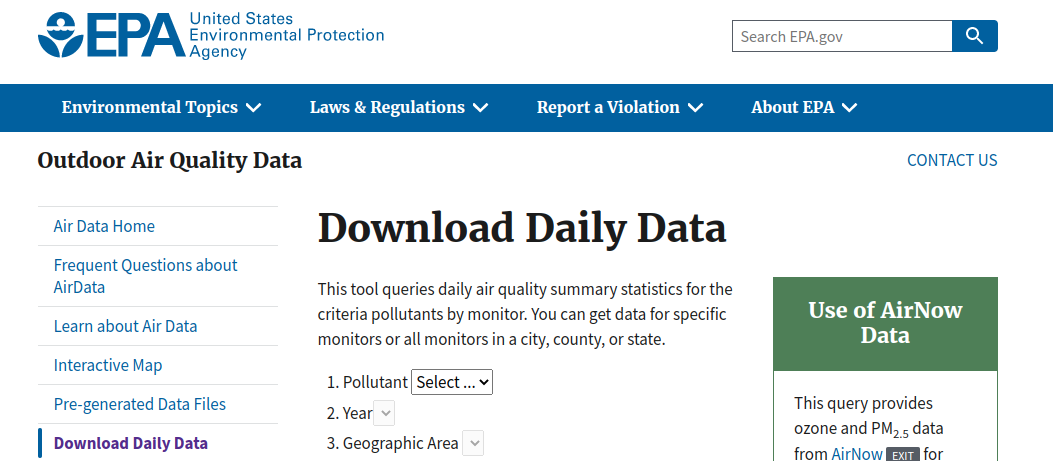

Para fins de ilustração, baixamos os dados PM2.5 do Texas em $2021$. Podemos importar o arquivo CSV, **baixadoad_viz_plotval_data.csv**, da seguinte forma:

In [44]:
df = pd.read_csv("/content/drive/MyDrive/5_Scripts_in_Python_Eddy/1_ML_Mastery_Pandas_Numpy_Scipy/ad_viz_plotval_data.csv", parse_dates=[0])


In [45]:
df.head(2)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2021-01-01,AQS,480131090,1,4.6,ug/m3 LC,19,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158
1,2021-01-02,AQS,480131090,1,3.7,ug/m3 LC,15,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158


In [43]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2021,AQS,480131090,1,4.6,ug/m3 LC,19,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158
1,01/02/2021,AQS,480131090,1,3.7,ug/m3 LC,15,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158
2,01/03/2021,AQS,480131090,1,6.3,ug/m3 LC,26,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158
3,01/04/2021,AQS,480131090,1,6.4,ug/m3 LC,27,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158
4,01/05/2021,AQS,480131090,1,7.7,ug/m3 LC,32,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158


In [46]:
df.shape

(19700, 20)

In [47]:
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.970000e+04,19700.000000,19700.000000,19700.000000,19700.0,19700.0,19700.000000,19330.000000,19700.0,19700.000000,19700.000000,19700.000000
mean,4.822137e+08,2.288477,8.725822,34.812081,1.0,100.0,88187.021624,24590.714951,48.0,221.315431,30.403207,-97.829434
std,1.363153e+06,1.249267,4.809589,16.064471,0.0,0.0,164.609620,9209.835324,0.0,136.316013,2.016468,3.246901
min,4.801311e+08,1.000000,-3.600000,0.000000,1.0,100.0,88101.000000,11100.000000,48.0,13.000000,25.892518,-106.501243
25%,4.813510e+08,1.000000,5.500000,23.000000,1.0,100.0,88101.000000,18620.000000,48.0,135.000000,29.423937,-98.391403
50%,4.820110e+08,2.000000,7.700000,32.000000,1.0,100.0,88101.000000,21340.000000,48.0,201.000000,29.922894,-97.337917
75%,4.834911e+08,3.000000,10.900000,45.000000,1.0,100.0,88101.000000,28660.000000,48.0,349.000000,31.870259,-95.326137
max,4.847903e+08,8.000000,70.800000,159.000000,1.0,100.0,88502.000000,47380.000000,48.0,479.000000,35.201592,-93.866944


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19700 entries, 0 to 19699
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            19700 non-null  datetime64[ns]
 1   Source                          19700 non-null  object        
 2   Site ID                         19700 non-null  int64         
 3   POC                             19700 non-null  int64         
 4   Daily Mean PM2.5 Concentration  19700 non-null  float64       
 5   UNITS                           19700 non-null  object        
 6   DAILY_AQI_VALUE                 19700 non-null  int64         
 7   Site Name                       19344 non-null  object        
 8   DAILY_OBS_COUNT                 19700 non-null  int64         
 9   PERCENT_COMPLETE                19700 non-null  float64       
 10  AQS_PARAMETER_CODE              19700 non-null  int64         
 11  AQ

A função ``read_csv()`` de pandas nos permite especificar algumas colunas como a data e analisá-las em objetos ``datetime`` em vez de uma string. Isso é essencial para o processamento posterior de dados de séries temporais. Como sabemos, a primeira coluna (indexada a zero) é a coluna de data; fornecemos o argumento acima ``parse_dates=[0]``.


Para manipular dados de séries temporais, é importante usar o tempo como um índice em seu DataFrame. Podemos tornar uma das colunas um índice pela função ``set_index()``:

In [49]:
df_pm25 = df.set_index("Date")


In [51]:
df_pm25.head(3)

,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,,,,,,,,
2021-01-01,AQS,480131090,1,4.6,ug/m3 LC,19,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158
2021-01-02,AQS,480131090,1,3.7,ug/m3 LC,15,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158
2021-01-03,AQS,480131090,1,6.3,ug/m3 LC,26,Von Ormy Highway 16,1,100.0,88101,PM2.5 - Local Conditions,41700.0,"San Antonio-New Braunfels, TX",48,Texas,13,Atascosa,29.162997,-98.589158


In [52]:
df_pm25.shape

(19700, 19)

Se examinarmos o índice deste DataFrame, veremos o seguinte:

In [55]:
df_pm25.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=19700, freq=None)

Sabemos que seu tipo é ``datetime64``, que é um objeto timestamp em pandas.

A partir do índice acima, podemos ver que cada data não é única. Isso ocorre porque a concentração de ``PM2.5`` é observada em locais diferentes e cada um contribuirá com uma linha para o DataFrame. Podemos filtrar o DataFrame para apenas um site para tornar o índice exclusivo. Alternativamente, podemos usar ``pivot_table()`` para transformar o DataFrame, onde a operação ``pivô`` garante que o DataFrame resultante terá um índice único:

In [56]:
df_2021 = ( df[["Date", "Daily Mean PM2.5 Concentration", "Site Name"]]
            .pivot_table(index="Date",
                         columns="Site Name",
                         values="Daily Mean PM2.5 Concentration")
          )

In [57]:
df_2021.head()

Site Name,Amarillo A&M,Ascarate Park SE,Austin North Hills Drive,Austin North Interstate 35,Austin Webberville Rd,Baytown,Big Bend NP - K-Bar Ranch Road,Brownsville,Bryan Finfeather Road,Calaveras Lake,...,Port Arthur Memorial School,San Antonio Interstate 35,San Antonio Northwest,Seabrook Friendship Park,Socorro Hueco,Temple Georgia,Texarkana New Boston,Von Ormy Highway 16,Waco Mazanec,World Trade Bridge
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.7,11.9,3.0,4.1,4.2,4.4,2.8,12.9,3.2,2.4,...,3.6,4.2,6.7,3.1,7.6,0.5,2.6,4.6,2.7,4.4
2021-01-02,2.2,7.8,6.1,4.6,7.0,4.8,3.2,4.1,2.7,3.5,...,9.3,6.9,7.7,6.4,8.6,3.7,4.6,3.7,2.2,6.1
2021-01-03,2.5,4.2,4.3,5.7,8.1,6.5,3.5,8.8,3.5,4.6,...,10.2,12.6,10.7,4.0,5.9,6.2,8.0,6.3,4.2,8.5
2021-01-04,3.7,8.1,3.7,5.2,7.9,6.0,3.0,6.2,5.0,5.2,...,5.6,9.7,7.3,4.1,8.3,4.7,6.2,6.4,4.2,5.7
2021-01-05,4.5,10.0,5.2,7.5,7.7,7.6,4.0,6.4,7.2,5.5,...,6.5,7.7,7.6,5.8,7.3,5.5,5.0,7.7,6.1,7.1


Podemos verificar a unicidade com:

In [58]:
df_2021.index.is_unique

True

Agora, cada coluna neste DataFrame é uma série temporal . Embora o pandas não forneça nenhuma função de previsão na série temporal, ele vem com ferramentas para ajudá-lo a limpar e transformar os dados. Definir um ``DateTimeIndex`` para um DataFrame será útil para projetos de análise de séries temporais porque podemos extrair facilmente dados para um intervalo de tempo, **por exemplo**, a divisão de teste de treino (``train-test split``) da série temporal. Abaixo está como podemos extrair um subconjunto de $3$ meses do DataFrame acima:

In [59]:
df_3month = df_2021["2021-04-01":"2021-07-01"]

In [60]:
df_3month.head()

Site Name,Amarillo A&M,Ascarate Park SE,Austin North Hills Drive,Austin North Interstate 35,Austin Webberville Rd,Baytown,Big Bend NP - K-Bar Ranch Road,Brownsville,Bryan Finfeather Road,Calaveras Lake,...,Port Arthur Memorial School,San Antonio Interstate 35,San Antonio Northwest,Seabrook Friendship Park,Socorro Hueco,Temple Georgia,Texarkana New Boston,Von Ormy Highway 16,Waco Mazanec,World Trade Bridge
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,5.7,7.5,7.3,5.7,6.5,8.8,4.7,8.4,7.5,5.1,...,6.1,5.4,5.80,7.3,7.3,6.0,11.3,5.6,11.4,NaN
2021-04-02,11.2,10.3,13.7,12.4,12.4,9.6,6.8,5.6,13.1,7.9,...,4.4,8.5,10.30,5.2,9.1,12.0,7.5,10.0,21.9,8.9
2021-04-03,9.3,11.8,6.2,6.3,6.9,6.9,5.5,5.3,5.9,6.0,...,5.5,4.9,6.30,5.3,10.4,6.3,9.5,6.7,9.7,7.2
2021-04-04,7.8,18.4,7.0,6.4,7.7,10.3,5.3,5.2,10.3,6.0,...,8.4,5.7,6.35,7.9,8.1,7.7,13.9,5.0,9.1,6.0
2021-04-05,9.1,13.3,7.2,8.0,8.5,10.8,6.4,5.9,6.0,5.9,...,6.9,5.5,7.00,6.5,6.6,7.1,14.5,6.2,9.1,6.9


Uma função comumente usada em uma série temporal é ``reamostrar`` os dados. Considerando os dados diários neste DataFrame, podemos transformá-los em observações semanais. Podemos especificar os dados resultantes a serem indexados todos os domingos. Mas ainda temos que dizer como queremos que sejam os dados reamostrados. Se forem dados de vendas, provavelmente queremos somar toda a semana para obter a receita semanal. Nesse caso, podemos tirar a média de uma semana para suavizar as flutuações. Uma alternativa é fazer a primeira observação em cada período, como abaixo:

In [61]:
df_resample = df_2021.resample("W-SUN").first()

df_resample.head()

Site Name,Amarillo A&M,Ascarate Park SE,Austin North Hills Drive,Austin North Interstate 35,Austin Webberville Rd,Baytown,Big Bend NP - K-Bar Ranch Road,Brownsville,Bryan Finfeather Road,Calaveras Lake,...,Port Arthur Memorial School,San Antonio Interstate 35,San Antonio Northwest,Seabrook Friendship Park,Socorro Hueco,Temple Georgia,Texarkana New Boston,Von Ormy Highway 16,Waco Mazanec,World Trade Bridge
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-03,1.7,11.9,3.0,4.1,4.2,4.4,2.8,12.9,3.2,2.4,...,3.6,4.2,6.7,3.1,7.6,0.5,2.6,4.6,2.7,4.4
2021-01-10,3.7,8.1,3.7,5.2,7.9,6.0,3.0,6.2,5.0,5.2,...,5.6,9.7,7.3,4.1,8.3,4.7,6.2,6.4,4.2,5.7
2021-01-17,5.8,5.3,7.0,5.5,7.2,10.7,4.3,4.8,14.8,3.1,...,6.5,5.4,5.7,7.0,5.0,5.2,12.8,5.4,6.9,4.8
2021-01-24,2.9,12.3,8.0,14.2,10.7,16.5,2.4,4.4,9.9,7.0,...,10.0,9.5,9.1,11.9,9.6,7.8,9.3,11.7,8.2,7.3
2021-01-31,3.7,5.2,6.3,7.4,8.9,9.0,3.5,33.9,5.5,7.9,...,5.9,9.7,10.3,8.2,5.3,4.3,4.0,9.8,6.2,19.9


A string “W-SUN” serve para determinar a média semanal aos domingos. É chamado de “[alias de deslocamento](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)”. Você pode encontrar a lista de todos os alias de deslocamento abaixo:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

A reamostragem é particularmente útil em dados do mercado financeiro. Imagine se tivermos os dados de preços do mercado, onde os dados brutos não vêm em intervalos regulares. Ainda podemos usar reamostragem para converter os dados em intervalos regulares. Por ser tão comumente usado, o pandas ainda fornece a você o ``open-high-low-close`` (conhecido como OHLC, ou seja, primeiras, máximas, mínimas e últimas observações durante um período) da reamostragem. Demonstramos abaixo como obter o OHLC ao longo de uma semana em um dos locais de observação:

In [62]:
df_ohlc = df_2021["San Antonio Interstate 35"].resample("W-SUN").ohlc()


df_ohlc.head()

,open,high,low,close
Date,,,,
2021-01-03,4.2,12.6,4.2,12.6
2021-01-10,9.7,9.7,3.0,5.7
2021-01-17,5.4,13.8,3.0,13.8
2021-01-24,9.5,11.5,5.7,9.0
2021-01-31,9.7,10.3,3.3,9.6


Em particular, se reamostramos uma série temporal de uma frequência mais grosseira para uma frequência mais fina, isso é chamado de upsampling . Pandas geralmente insere NaNvalores durante o upsampling, pois a série temporal original não possui dados durante as instâncias de tempo intermediárias. Uma maneira de evitar esses NaNvalores durante o upsampling é pedir aos pandas para preencher antecipadamente (transportar valores de um momento anterior) ou preencher novamente (usando valores de um momento posterior) os dados. Por exemplo, o seguinte é preencher as observações PM2,5 diárias de um local para uma hora:

In [63]:
series_ffill = df_2021["San Antonio Interstate 35"].resample("H").ffill()


series_ffill.head()

Date
2021-01-01 00:00:00    4.2
2021-01-01 01:00:00    4.2
2021-01-01 02:00:00    4.2
2021-01-01 03:00:00    4.2
2021-01-01 04:00:00    4.2
Freq: H, Name: San Antonio Interstate 35, dtype: float64

Além da reamostragem, também podemos transformar os dados usando uma janela deslizante. Por exemplo, abaixo está como podemos fazer uma média móvel de 10 dias a partir da série temporal. Não é uma reamostragem porque os dados resultantes ainda são diários. Mas para cada ponto de dados, é a média dos últimos 10 dias. Da mesma forma, podemos encontrar o desvio padrão de 10 dias ou o máximo de 10 dias aplicando uma função diferente ao objeto rolante.



In [64]:
df_mean = df_2021["San Antonio Interstate 35"].rolling(10).mean()


df_mean.head()

Date
2021-01-01   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
2021-01-05   NaN
Name: San Antonio Interstate 35, dtype: float64

Para mostrar como as séries temporais originais e médias contínuas diferem, abaixo mostra o gráfico. Adicionamos o argumento  min_periods=5 à  rolling()função porque os dados originais têm dados ausentes em alguns dias. Isso produz lacunas nos dados diários, mas pedimos que a média ainda seja calculada enquanto houver 5 pontos de dados na janela dos últimos 10 dias.

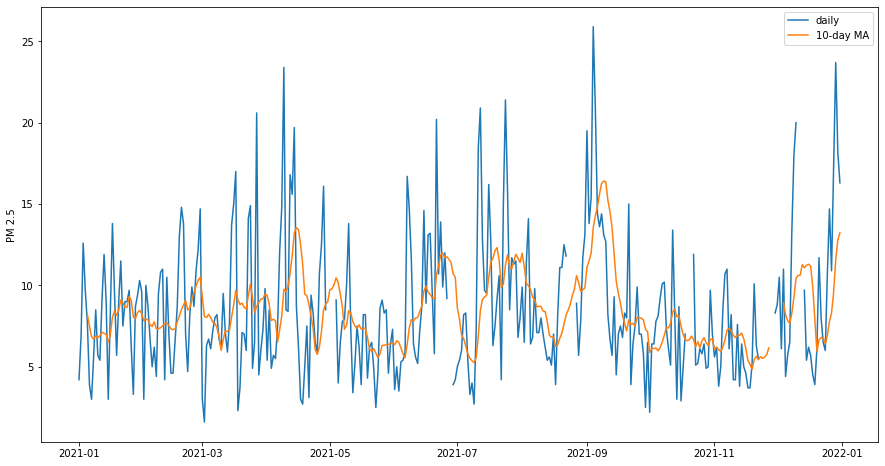

In [66]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(15,8))
plt.plot(df_2021["San Antonio Interstate 35"], label="daily")
plt.plot(df_2021["San Antonio Interstate 35"].rolling(10, min_periods=5).mean(), label="10-day MA")
plt.legend()
plt.ylabel("PM 2.5")
plt.show()

Ver:

* [Guia de Usuário Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)